In [2]:
#Standard Imports
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import seaborn as sns
sns.set()

#Link to my Github repository containing the notebook:
#https://github.com/dbergqu1745/bergquist_project1/upload/master

In [3]:
#Data set contains league hitting statistics totals from 1900
#(the beginning of the dead ball era) to 2018
batting = Table.read_table('batting.csv')

# Column Header Key
Year -- The baseball season takes place from April November (depending on how long the postseason takes), so the year column represents the season in which the statistics were achieved

Tms -- The number of teams participating that season

#Bat -- Number of Players used in Games

R/G -- Runs Scored Per Game

G -- Games Played or Pitched

PA -- Plate Appearances When available, we use actual plate appearances from play-by-play game accounts. Otherwise estimated using AB + BB + HBP + SF + SH, which excludes catcher interferences.

AB -- At Bats

R -- Runs Scored/Allowed

H -- Hits/Hits Allowed

2B -- Doubles Hit/Allowed

3B -- Triples Hit/Allowed

HR -- Home Runs Hit/Allowed

RBI -- Runs Batted In

SB -- Stolen Bases

CS -- Caught Stealing

BB -- Bases on Balls/Walks

SO -- Strikeouts

BA -- Hits/At Bats For recent years, leaders need 3.1 Plate Appearances per team game played

OBP -- On-Base Percentage (H + BB + HBP)/(At Bats + BB + HBP + SF) For recent years, leaders need 3.1 Plate Appearances per team game played

SLG -- Slugging Percentage: Total Bases/At Bats or (1B + 2*2B + 3*3B + 4*HR)/AB For recent years, leaders need 3.1 Plate Appearances per team game played

OPS -- On-Base + Slugging Percentages. For recent years, leaders need 3.1 Plate Appearances per team game played

TB -- Total Bases (Singles + 2 x Doubles + 3 x Triples + 4 x Home Runs).

GDP -- Double Plays Grounded Into. Only includes standard 6-4-3, 4-3, etc. double plays, First tracked in 1933. For gamelogs only in seasons we have play-by-play, we include triple plays as well. All official seasonal totals do not include GITP's.

HBP -- Times Hit by a Pitch.

SH -- Sacrifice Hits (Sacrifice Bunts)

SF -- Sacrifice Flies, First tracked in 1954.

IBB -- Intentional Walks, First tracked in 1955.

In [4]:
#The age of the batter was not important
batting = batting.drop('BatAge')
batting.show(200)

Year,Tms,#Bat,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
2018,30,1270,4.45,4862,185139,165432,21630,41019,8265,847,5585,20606,2474,958,15686,41207,0.248,0.318,0.409,0.728,67733,3457,1922,823,1235,929
2017,30,1229,4.65,4860,185295,165567,22582,42215,8397,795,6105,21558,2527,934,15829,40104,0.255,0.324,0.426,0.75,70517,3804,1763,925,1168,970
2016,30,1247,4.48,4856,184580,165561,21744,42276,8254,873,5610,20745,2537,1001,15088,38982,0.255,0.322,0.417,0.739,69106,3719,1651,1025,1214,932
2015,30,1252,4.25,4858,183628,165488,20647,42106,8242,939,4909,19650,2505,1064,14073,37446,0.254,0.317,0.405,0.721,66953,3739,1602,1200,1232,951
2014,30,1212,4.07,4860,183929,165614,19761,41595,8137,849,4186,18745,2764,1035,14020,37441,0.251,0.314,0.386,0.7,63988,3609,1652,1343,1277,985
2013,30,1202,4.17,4862,184873,166070,20255,42093,8222,772,4661,19271,2693,1007,14640,36710,0.253,0.318,0.396,0.714,65842,3732,1536,1383,1219,1018
2012,30,1185,4.32,4860,184180,165251,21017,42063,8261,927,4934,19998,3229,1136,14709,36426,0.255,0.319,0.405,0.724,66980,3614,1494,1479,1223,1055
2011,30,1173,4.28,4858,185245,165705,20808,42267,8399,898,4552,19804,3279,1261,15018,34488,0.255,0.321,0.399,0.72,66118,3523,1554,1667,1274,1231
2010,30,1157,4.38,4860,185553,165353,21308,42554,8486,866,4613,20288,2959,1129,15778,34306,0.257,0.325,0.403,0.728,66611,3719,1549,1544,1301,1216
2009,30,1156,4.61,4860,187079,165849,22419,43524,8737,949,5042,21364,2970,1133,16620,33591,0.262,0.333,0.418,0.751,69285,3796,1590,1635,1366,1179


In [5]:
#finding the total number of single base hits
#Total number of hits less (triples + doubles + homers)
singles = batting.column('H') - (batting.column('2B') + batting.column('3B') + batting.column('HR'))

#dividing the total number of plate appearances by 3 to approximate the total number of innings
homers_per_inning = batting.column('HR')/(batting.column('PA')/3)

#At the suggestion of David Vincent's article, adding a column for the number of plate 
#appearances divided by 500
appearances_by_500 = batting.column('PA')/500

In [8]:
#Adding singles to the table
batting = batting.with_column('1B', singles)

#Total number of hits
all_hits = batting.select('Year', 'Tms', '1B', '2B', '3B', 'HR')

#total number of home runs
homers = batting.select('Year', 'HR')

#total number of runs batted in
runs_batted_in = batting.select('Year', 'RBI')

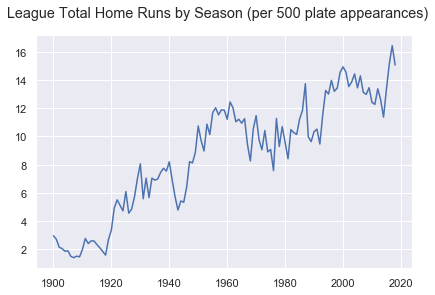

In [13]:
plots.suptitle('League Total Home Runs by Season (per 500 plate appearances)')
plots.plot(homers.column('Year'), (homers.column('HR')/appearances_by_500))
#Testing the home runs per 500 plate appearances way of looking at the stats
#like in the competitive balance article

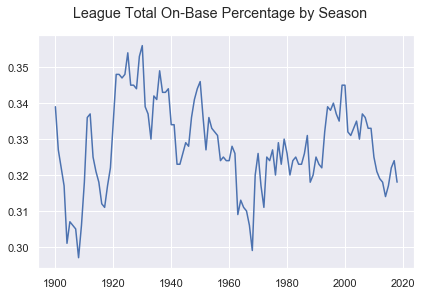

In [8]:
#Here, there was another substantial jump between the
#1920 and 1921 seasons, suggesting that the rule change
#also made it easier for batters to reach base. This number
#being an average also lessens the effect of increased team size
#on the hitting statistics
plots.suptitle('League Total On-Base Percentage by Season')
plots.plot(batting.column('Year'), batting.column('OBP'))

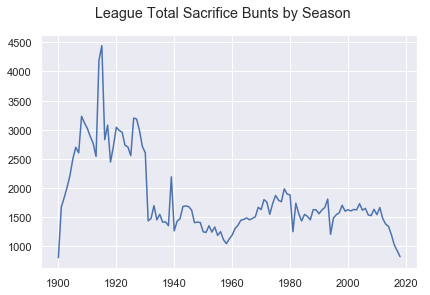

In [9]:
#My reasoning for including the stats on sacrifice bunts
#was to see if the rule change had an impact on how batters
#would prioritize advancing runners, as opposed to purely scoring home runs
plots.suptitle('League Total Sacrifice Bunts by Season')
plots.plot(batting.column('Year'), batting.column('SH'))

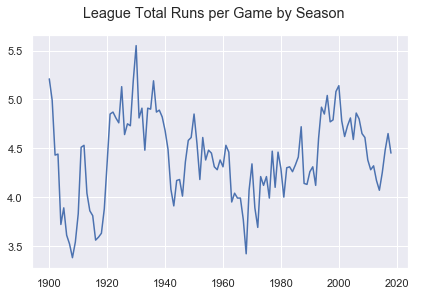

In [10]:
#Much like with the home runs, the league total runs 
#per game made a substantial jump between the 1920 and 1921 seasons
#It has also been very volatile between the late sixties and early
#eighties. My assumption is that the increase in the number of teams
#led to an increase in the number of games played while the number of 
#runs apparently stagnated
plots.suptitle('League Total Runs per Game by Season')
plots.plot(batting.column('Year'), batting.column('R/G'))

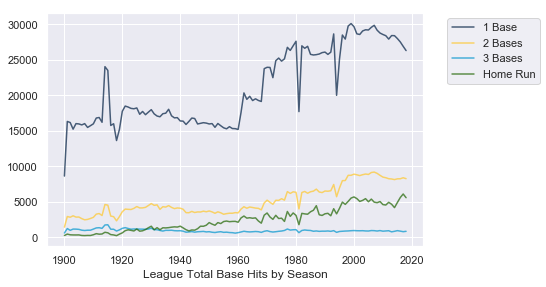

In [17]:
#Each type of base hit takes a sharp increase between the 1920 and 
#1921 seasons
Bases = Table().with_columns(
    'League Total Base Hits by Season', batting.column('Year'),
    '1 Base', batting.column('1B'),
    '2 Bases', batting.column('2B'),
    '3 Bases', batting.column('3B'),
    'Home Run', batting.column('HR')
).plot('League Total Base Hits by Season')
Bases

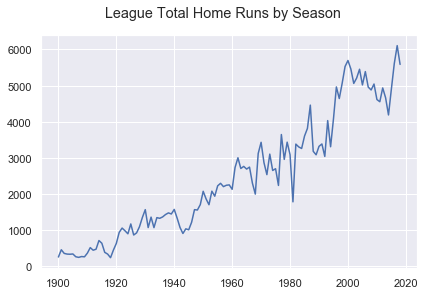

In [16]:
plots.suptitle('League Total Home Runs by Season')
plots.plot(homers.column('Year'), homers.column('HR'))